In [1]:
# if you wanna have real publication of XGBoost check this out:
#  https://arxiv.org/pdf/1603.02754.pdf

In [2]:
#lets give a realistic example

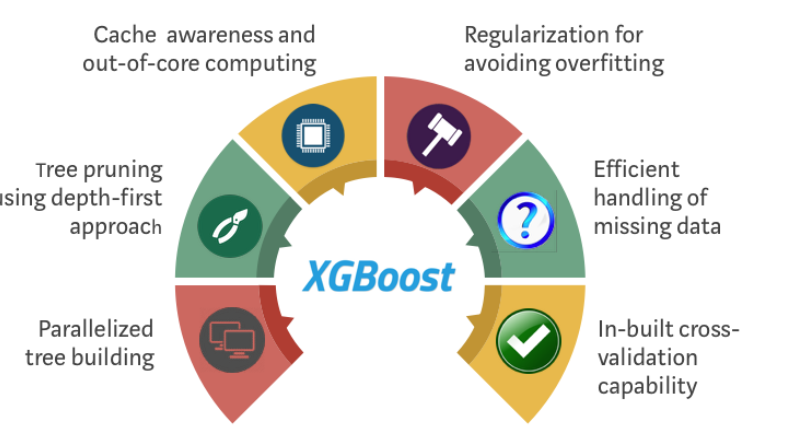

In [3]:
from IPython.display import Image
Image(filename='xgboost1.png') 

In [4]:
# I repeat again


In [5]:
# all imports
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier,plot_tree
# dataset
X = np.array([2,8,12,18]).reshape((4,1))
y = np.array([0,1,1,0])
# Define parameters and fit XgBoost Model
model=XGBClassifier(max_depth=2,learning_rate=1,n_estimators=2,gamma=2,
                    min_child_weight=0,reg_alpha=0,reg_lambda=0,base_score=0.5)
model.fit(X, y)

# plot the first tree


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [7]:
#now adaboost, dont get confused, adabost: Adaptive boosting in Ensemble Learning (Remember what is boosting now?)

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [9]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [10]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
pd.set_option('display.max_columns', None)
y


['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']

In [12]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y)) # dont forget, encoders are your friends!
binary_encoded_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=101)

In [14]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)
#max_depth=1 is used to tell our model that we’d like our forest to be composed 
#of trees with a single decision node and two leaves.
#n_estimators is used to specify the total number of trees in the forest.

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [15]:
predictions = classifier.predict(test_X)

In [16]:
confusion_matrix(test_y, predictions)

array([[87,  1],
       [ 1, 54]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,predictions))
print(classification_report(test_y,predictions))

[[87  1]
 [ 1 54]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [18]:
from sklearn.metrics import accuracy_score
print('Adaboost:', accuracy_score(test_y, predictions)*100,'%')

Adaboost: 98.6013986013986 %


In [19]:
#YOU ARE NOT GOING ANYWHERE BEFORE YOU TEST YOUR DATA PROPERLY

In [20]:
data = [[16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.13840,0.000000,0.000000,0.1587,0.05884,0.17100,0.20000,0.09127,0.2226,0.08283,0.05697,19.190,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,
         0.08452]]  
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']) 
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.1384,0.0,0.0,0.1587,0.05884,0.171,0.2,0.09127,0.2226,0.08283,0.05697,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [21]:
prediction= classifier.fit(train_X, train_y).predict(df) # 1 or 0 as yes or no.
prediction

array([0])

In [22]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')